In [39]:
from sklearn.model_selection import train_test_split,cross_val_score,ShuffleSplit,GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder,LabelEncoder,StandardScaler
from sklearn.compose import ColumnTransformer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [40]:
train_data=pd.read_csv('train.csv',index_col='PassengerId')

In [41]:
train_data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [42]:
td=train_data.copy()

In [43]:
td.info()

#cabin is missing most data, so I will remove
# Age-- impute median 
#Embarked--fill in most common for the missing one
#will want to one-hot encode sex and embarked

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [44]:
td['Parch'].values
# how many parents or children they had on board

array([0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 1, 0, 0, 5, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 5, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 2, 2, 0, 0, 0, 2, 0, 1,
       0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 3, 0,
       2, 0, 0, 0, 0, 2, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 1, 0, 2, 2, 0, 0, 0, 0, 2,
       0, 1, 0, 0, 0, 2, 1, 0, 0, 0, 1, 2, 1, 4, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 2, 0, 2, 1, 2, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 2, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 2, 1, 0, 0, 1, 0, 0, 2, 2, 0, 0, 0, 1, 0, 2, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 1, 0,

In [45]:
td['SibSp'].values
# how many siblings and spouses they had on board

array([1, 1, 0, 1, 0, 0, 0, 3, 0, 1, 1, 0, 0, 1, 0, 0, 4, 0, 1, 0, 0, 0,
       0, 0, 3, 1, 0, 3, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 2, 1, 1, 1, 0, 1,
       0, 0, 1, 0, 2, 1, 4, 0, 1, 1, 0, 0, 0, 0, 1, 5, 0, 0, 1, 3, 0, 1,
       0, 0, 4, 2, 0, 5, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 1, 0,
       3, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 4, 2, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 2, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 8, 0, 0, 0, 0, 4, 0, 0, 1, 0, 0, 0, 4, 1, 0, 0, 1,
       3, 0, 0, 0, 8, 0, 4, 2, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 8, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 3, 1, 0, 0, 4, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 2, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 4, 1, 0,
       0, 0, 4, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 4, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,

In [46]:
set(td['Embarked'].values)
# C = Cherbourg, Q = Queenstown, S = Southampton : The port where they got on

{'C', 'Q', 'S', nan}

In [47]:
td['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [48]:
td['Name'].values
#can we engineer odds of survival of others with same last name? 

array(['Braund, Mr. Owen Harris',
       'Cumings, Mrs. John Bradley (Florence Briggs Thayer)',
       'Heikkinen, Miss. Laina',
       'Futrelle, Mrs. Jacques Heath (Lily May Peel)',
       'Allen, Mr. William Henry', 'Moran, Mr. James',
       'McCarthy, Mr. Timothy J', 'Palsson, Master. Gosta Leonard',
       'Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)',
       'Nasser, Mrs. Nicholas (Adele Achem)',
       'Sandstrom, Miss. Marguerite Rut', 'Bonnell, Miss. Elizabeth',
       'Saundercock, Mr. William Henry', 'Andersson, Mr. Anders Johan',
       'Vestrom, Miss. Hulda Amanda Adolfina',
       'Hewlett, Mrs. (Mary D Kingcome) ', 'Rice, Master. Eugene',
       'Williams, Mr. Charles Eugene',
       'Vander Planke, Mrs. Julius (Emelia Maria Vandemoortele)',
       'Masselmani, Mrs. Fatima', 'Fynney, Mr. Joseph J',
       'Beesley, Mr. Lawrence', 'McGowan, Miss. Anna "Annie"',
       'Sloper, Mr. William Thompson', 'Palsson, Miss. Torborg Danira',
       'Asplund, Mrs. Carl Oscar 

In [49]:
td['Ticket'].values
# not sure what letter values mean, or if numerical order provides any information


array(['A/5 21171', 'PC 17599', 'STON/O2. 3101282', '113803', '373450',
       '330877', '17463', '349909', '347742', '237736', 'PP 9549',
       '113783', 'A/5. 2151', '347082', '350406', '248706', '382652',
       '244373', '345763', '2649', '239865', '248698', '330923', '113788',
       '349909', '347077', '2631', '19950', '330959', '349216',
       'PC 17601', 'PC 17569', '335677', 'C.A. 24579', 'PC 17604',
       '113789', '2677', 'A./5. 2152', '345764', '2651', '7546', '11668',
       '349253', 'SC/Paris 2123', '330958', 'S.C./A.4. 23567', '370371',
       '14311', '2662', '349237', '3101295', 'A/4. 39886', 'PC 17572',
       '2926', '113509', '19947', 'C.A. 31026', '2697', 'C.A. 34651',
       'CA 2144', '2669', '113572', '36973', '347088', 'PC 17605', '2661',
       'C.A. 29395', 'S.P. 3464', '3101281', '315151', 'C.A. 33111',
       'CA 2144', 'S.O.C. 14879', '2680', '1601', '348123', '349208',
       '374746', '248738', '364516', '345767', '345779', '330932',
       '113059',

In [50]:
td.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


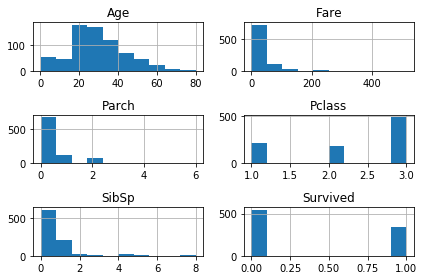

In [51]:
td.hist()
plt.tight_layout()
# most people poor
# most people traveling alone


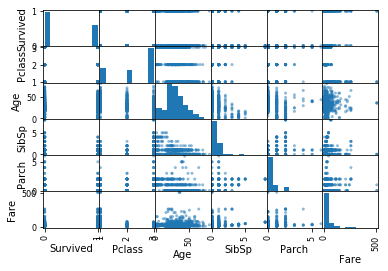

In [52]:
tdnumerical=td.drop(['Name','Ticket','Embarked','Cabin','Sex'],axis=1)
pd.plotting.scatter_matrix(tdnumerical)
plt.show()

# pretty hard to see anything of interest with respect to survival, due to the predicted value being categorical
#also class is actually a quasi-categorical value

In [53]:
corr_matrix = td.corr()
corr_matrix
#class and fare seem strongest
#class and fare very correlated
#class and age moderately correlated


,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [54]:
# only use provided test set on very last attempt

# remove ticket, name, cabin for now
td1=td.drop(['Name','Ticket','Cabin'],axis=1)

train_labels=td1['Survived']
train_set=td1.drop('Survived',axis=1)

In [55]:
train_set.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,
1,3,male,22.0,1,0,7.2500,S
2,1,female,38.0,1,0,71.2833,C
3,3,female,26.0,0,0,7.9250,S
4,1,female,35.0,1,0,53.1000,S
5,3,male,35.0,0,0,8.0500,S


In [56]:
#processing pipelines
# need to make numerical while preserving nans to use an imputer
#also turns out LabelEncoder can't be used within pipeline as is

def categoricalImpute(series,commonvalue):
    mask=pd.isnull(series)
    series[mask]=commonvalue
    
    return series





#Impute embarked values before moving on--S is most common onboarding point
train_set['Embarked']=categoricalImpute(train_set['Embarked'],'S')





C:\Users\jumpi\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [57]:
train_set['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [58]:

num_attribs=['Age','SibSp','Parch','Fare']
cat_attribs=['Embarked','Sex']

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('std_scaler', StandardScaler())])

cat_pipeline= Pipeline([
    #only one item, but make pipeline incase more are added later
    ('onehot',OneHotEncoder()),
])

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", cat_pipeline, cat_attribs),
    ])


train_prepared=full_pipeline.fit_transform(train_set)


In [59]:
# first model, random forest
from sklearn.ensemble import RandomForestClassifier

model=RandomForestClassifier()
model.fit(train_prepared,train_labels)
scores = cross_val_score(model, train_prepared, train_labels,
                         scoring="accuracy", cv=5)

print(np.mean(scores))

0.7878764247086748


C:\Users\jumpi\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [60]:
#SVM
from sklearn.svm import SVC
model2=SVC()
model2.fit(train_prepared,train_labels)
scores = cross_val_score(model2, train_prepared, train_labels,
                         scoring="accuracy", cv=5)

print(np.mean(scores))
#a bet better?

0.8271966996088711


C:\Users\jumpi\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\jumpi\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\jumpi\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\jumpi\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarni

In [61]:
#Adaboost
from sklearn.ensemble import AdaBoostClassifier

model3=AdaBoostClassifier()
model3.fit(train_prepared,train_labels)

scores = cross_val_score(model3, train_prepared, train_labels,
                         scoring="accuracy", cv=5)
print(np.mean(scores))

0.8048062495500548


In [64]:
from sklearn.neighbors import KNeighborsClassifier
model4=KNeighborsClassifier()
model4.fit(train_prepared,train_labels)
scores = cross_val_score(model4, train_prepared, train_labels,
                         scoring="accuracy", cv=5)
print(np.mean(scores))

0.803676376974573


In [65]:
from sklearn.linear_model import SGDClassifier
model5=SGDClassifier()
model5.fit(train_prepared,train_labels)
scores = cross_val_score(model5, train_prepared, train_labels,
                         scoring="accuracy", cv=5)
print(np.mean(scores))

0.7173406360125781


C:\Users\jumpi\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
C:\Users\jumpi\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
C:\Users\jumpi\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=

In [25]:
#Gridsearch RF

param_grid={'criterion': ['gini', 'entropy'],'n_estimators':[5,10,50,100],
            'max_depth': [2,5,10,50,None],'min_samples_split': [2,5,10,25],
            'min_samples_leaf': [1,5,10,20],'random_state': [42]}

cv_split=ShuffleSplit(n_splits = 10, test_size = .2, train_size = .8, random_state = 42 )

tune_model = GridSearchCV(RandomForestClassifier(), param_grid=param_grid, scoring = 'accuracy', cv = cv_split)
tune_model.fit(train_prepared, train_labels)


print('best parameters ', tune_model.best_params_)




best parameters  {'criterion': 'entropy', 'max_depth': 50, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 50, 'random_state': 42}


In [68]:
#grid search KNN

param_grid={'n_neighbors': [2, 5,10,20],'weights':['uniform','distance'],'algorithm':['auto','brute'],'leaf_size':[5,15,30,50]}

cv_split=ShuffleSplit(n_splits = 10, test_size = .2, train_size = .8, random_state = 42 )

bestKNN = GridSearchCV(KNeighborsClassifier(), param_grid=param_grid, scoring = 'accuracy', cv = cv_split)
bestKNN.fit(train_prepared, train_labels)


print('best parameters ', bestKNN.best_params_)

best parameters  {'algorithm': 'auto', 'leaf_size': 30, 'n_neighbors': 20, 'weights': 'uniform'}


In [69]:
scores=cross_val_score(bestKNN,train_prepared,train_labels,scoring='accuracy',cv=cv_split)
print(np.mean(scores))

0.811173184357542


In [27]:
bestRF=RandomForestClassifier(criterion= 'entropy', max_depth= 50, min_samples_leaf= 1, min_samples_split= 10, n_estimators= 50, random_state= 42)
bestRF.fit(train_prepared,train_labels)
cv_split=ShuffleSplit(n_splits = 10, test_size = .2, train_size = .8, random_state = 42 )

scores=cross_val_score(bestRF,train_prepared,train_labels,scoring='accuracy',cv=cv_split)
print(np.mean(scores))
#this did only the tiniest bit better

0.8279329608938546


In [27]:
#grid search svc

param_grid={'kernel': ['rbf', 'sigmoid'],'C':[1,.1,.01],'gamma':['auto','scale'],'max_iter':[10,100,-1],'tol':[.01,.001,.0001]}

cv_split=ShuffleSplit(n_splits = 10, test_size = .2, train_size = .8, random_state = 42 )

tune_modelSVC = GridSearchCV(SVC(), param_grid=param_grid, scoring = 'accuracy', cv = cv_split)
tune_modelSVC.fit(train_prepared, train_labels)

print('best parameters ', tune_modelSVC.best_params_)



C:\Users\jumpi\Anaconda3\lib\site-packages\sklearn\svm\base.py:244: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\jumpi\Anaconda3\lib\site-packages\sklearn\svm\base.py:244: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\jumpi\Anaconda3\lib\site-packages\sklearn\svm\base.py:244: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\jumpi\Anaconda3\lib\site-packages\sklearn\svm\base.py:244: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\jumpi\Anaconda3\lib\site-packages\sklea

C:\Users\jumpi\Anaconda3\lib\site-packages\sklearn\svm\base.py:244: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\jumpi\Anaconda3\lib\site-packages\sklearn\svm\base.py:244: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\jumpi\Anaconda3\lib\site-packages\sklearn\svm\base.py:244: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\jumpi\Anaconda3\lib\site-packages\sklearn\svm\base.py:244: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\jumpi\Anaconda3\lib\site-packages\s

C:\Users\jumpi\Anaconda3\lib\site-packages\sklearn\svm\base.py:244: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\jumpi\Anaconda3\lib\site-packages\sklearn\svm\base.py:244: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\jumpi\Anaconda3\lib\site-packages\sklearn\svm\base.py:244: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\jumpi\Anaconda3\lib\site-packages\sklearn\svm\base.py:244: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\jumpi\Anaconda3\lib\site-packages\s

C:\Users\jumpi\Anaconda3\lib\site-packages\sklearn\svm\base.py:244: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\jumpi\Anaconda3\lib\site-packages\sklearn\svm\base.py:244: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\jumpi\Anaconda3\lib\site-packages\sklearn\svm\base.py:244: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\jumpi\Anaconda3\lib\site-packages\sklearn\svm\base.py:244: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\jumpi\Anaconda3\lib\site-packages\s

C:\Users\jumpi\Anaconda3\lib\site-packages\sklearn\svm\base.py:244: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\jumpi\Anaconda3\lib\site-packages\sklearn\svm\base.py:244: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\jumpi\Anaconda3\lib\site-packages\sklearn\svm\base.py:244: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\jumpi\Anaconda3\lib\site-packages\sklearn\svm\base.py:244: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\jumpi\Anaconda3\lib\site-packages\s

C:\Users\jumpi\Anaconda3\lib\site-packages\sklearn\svm\base.py:244: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\jumpi\Anaconda3\lib\site-packages\sklearn\svm\base.py:244: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\jumpi\Anaconda3\lib\site-packages\sklearn\svm\base.py:244: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\jumpi\Anaconda3\lib\site-packages\sklearn\svm\base.py:244: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\jumpi\Anaconda3\lib\site-packages\s

C:\Users\jumpi\Anaconda3\lib\site-packages\sklearn\svm\base.py:244: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\jumpi\Anaconda3\lib\site-packages\sklearn\svm\base.py:244: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\jumpi\Anaconda3\lib\site-packages\sklearn\svm\base.py:244: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\jumpi\Anaconda3\lib\site-packages\sklearn\svm\base.py:244: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\jumpi\Anaconda3\lib\site-packages\s

C:\Users\jumpi\Anaconda3\lib\site-packages\sklearn\svm\base.py:244: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\jumpi\Anaconda3\lib\site-packages\sklearn\svm\base.py:244: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\jumpi\Anaconda3\lib\site-packages\sklearn\svm\base.py:244: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\jumpi\Anaconda3\lib\site-packages\sklearn\svm\base.py:244: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\jumpi\Anaconda3\lib\site-packages\s

C:\Users\jumpi\Anaconda3\lib\site-packages\sklearn\svm\base.py:244: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\jumpi\Anaconda3\lib\site-packages\sklearn\svm\base.py:244: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\jumpi\Anaconda3\lib\site-packages\sklearn\svm\base.py:244: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\jumpi\Anaconda3\lib\site-packages\sklearn\svm\base.py:244: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\jumpi\Anaconda3\lib\site-packages\s

C:\Users\jumpi\Anaconda3\lib\site-packages\sklearn\svm\base.py:244: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\jumpi\Anaconda3\lib\site-packages\sklearn\svm\base.py:244: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\jumpi\Anaconda3\lib\site-packages\sklearn\svm\base.py:244: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\jumpi\Anaconda3\lib\site-packages\sklearn\svm\base.py:244: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\jumpi\Anaconda3\lib\site-packages\s

C:\Users\jumpi\Anaconda3\lib\site-packages\sklearn\svm\base.py:244: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\jumpi\Anaconda3\lib\site-packages\sklearn\svm\base.py:244: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\jumpi\Anaconda3\lib\site-packages\sklearn\svm\base.py:244: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\jumpi\Anaconda3\lib\site-packages\sklearn\svm\base.py:244: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\jumpi\Anaconda3\lib\site-packages\s

C:\Users\jumpi\Anaconda3\lib\site-packages\sklearn\svm\base.py:244: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\jumpi\Anaconda3\lib\site-packages\sklearn\svm\base.py:244: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\jumpi\Anaconda3\lib\site-packages\sklearn\svm\base.py:244: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\jumpi\Anaconda3\lib\site-packages\sklearn\svm\base.py:244: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\jumpi\Anaconda3\lib\site-packages\s

C:\Users\jumpi\Anaconda3\lib\site-packages\sklearn\svm\base.py:244: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\jumpi\Anaconda3\lib\site-packages\sklearn\svm\base.py:244: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\jumpi\Anaconda3\lib\site-packages\sklearn\svm\base.py:244: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\jumpi\Anaconda3\lib\site-packages\sklearn\svm\base.py:244: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\jumpi\Anaconda3\lib\site-packages\s

best parameters  {'C': 1, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': -1, 'tol': 0.01}


In [38]:
bestSVC=SVC(C=1,gamma= 'scale', kernel= 'rbf', max_iter= -1, tol= 0.01, random_state= 42)
bestSVC.fit(train_prepared,train_labels)
scores=cross_val_score(bestSVC,train_prepared,train_labels,scoring='accuracy',cv=cv_split)
print(np.mean(scores))



0.8340782122905027


In [29]:
#SVC performed best, make predictions on the test data
test_data=pd.read_csv('test.csv',index_col=0)

In [30]:
test_data.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [31]:
test_prepared=test_data.drop(['Name','Ticket','Cabin'],axis=1)

In [34]:
test_prepared.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,
892,3,male,34.5,0,0,7.8292,Q
893,3,female,47.0,1,0,7.0000,S
894,2,male,62.0,0,0,9.6875,Q
895,3,male,27.0,0,0,8.6625,S
896,3,female,22.0,1,1,12.2875,S


In [36]:
test_prepared=full_pipeline.fit_transform(test_prepared)


In [60]:
preds=pd.DataFrame()
preds['PassengerId']=pd.Series(test_data.index)
preds['Survived']=bestSVC.predict(test_prepared)

In [62]:
preds.to_csv('predictions.csv',index=False)
#this one got ~.79 in official scoring

In [70]:
#let's try some feature engineering
# are they alone-- combine PARCH and SIBSP for estimate of family size
# are they a child <16
# are they elderly >64

def isChild(age):
    if age<16:
        return 1
    else:
        return 0
    
def isElderly(age):
    if age>64:
        return 1
    else:
        return 0

def isAlone(fsize):
    if fsize==0:
        return 1
    else:
        return 0

train_data2=td1.copy()
train_data2['FamilySize']=train_data2['SibSp']+train_data2['Parch']
train_data2['IsChild']=train_data2.apply(lambda row: isChild(row['Age']),axis=1)
train_data2['IsElderly']=train_data2.apply(lambda row: isElderly(row['Age']),axis=1)
train_data2['IsAlone']=train_data2.apply(lambda row: isAlone(row['FamilySize']),axis=1)






train_data2=train_data2.drop(['Survived'],axis=1)


In [72]:
num_attribs=['Age','Fare','FamilySize'] #replaced Sibsp, Parch
cat_attribs=['Embarked','Sex']

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('std_scaler', StandardScaler())])

cat_pipeline= Pipeline([
    #only one item, but make pipeline incase more are added later
    ('onehot',OneHotEncoder()),
])

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", cat_pipeline, cat_attribs),
    ])



train_data2['Embarked']=categoricalImpute(train_data2['Embarked'],'S')
train_data2=full_pipeline.fit_transform(train_data2)

C:\Users\jumpi\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [79]:
bestSVC2=SVC(C=1,gamma= 'scale', kernel= 'rbf', max_iter= -1, tol= 0.01, random_state= 42)
bestSVC2.fit(train_data2,train_labels)
scores=cross_val_score(bestSVC2,train_data2,train_labels,scoring='accuracy',cv=cv_split)
print(np.mean(scores))
#extremely modest improvement in validation

0.8379888268156425


In [80]:
test_prepared=test_data.drop(['Name','Ticket','Cabin'],axis=1)
test_prepared['FamilySize']=test_prepared['SibSp']+test_prepared['Parch']
test_prepared['IsChild']=test_prepared.apply(lambda row: isChild(row['Age']),axis=1)
test_prepared['IsElderly']=test_prepared.apply(lambda row: isElderly(row['Age']),axis=1)
test_prepared['IsAlone']=test_prepared.apply(lambda row: isAlone(row['FamilySize']),axis=1)

test_prepared=full_pipeline.fit_transform(test_prepared)
preds=pd.DataFrame()
preds['PassengerId']=pd.Series(test_data.index)
preds['Survived']=bestSVC2.predict(test_prepared)
preds.to_csv('predictions2.csv',index=False)

#this one is actually worse than original in testing

In [ ]:
#feature analysis
#so apparently it doesn't make sense to look for feature weights in an SVM with 
#a non-linear kernel--features are transformed into a higher dimensional state, 
#and the relationship between these higher dimensional features and lower space 
#is not easily recovered

#just keep final submission file
